<a href="https://colab.research.google.com/github/jibz33on/AI-Projects/blob/main/ATS_Resume_Matching_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install datasets faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and pla

In [3]:
import pandas as pd
from datasets import load_dataset
from faker import Faker

In [4]:
dataset = load_dataset("Sachinkelenjaguri/Resume_dataset")

# Convert to pandas DF

df = dataset["train"].to_pandas()
df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


UpdatedResumeDataSet.csv:   0%|          | 0.00/3.06M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/962 [00:00<?, ? examples/s]

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [5]:
df.shape

(962, 2)

In [6]:
print("Number of resumes:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of resumes: 962
Number of columns: 2


In [7]:
print("Column names:", df.columns.tolist())


Column names: ['Category', 'Resume']


In [8]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Category    0
Resume      0
dtype: int64


In [9]:
print("Job Categories (Top 10):")
print(df["Category"].value_counts().head(10))


Job Categories (Top 10):
Category
Java Developer         84
Testing                70
DevOps Engineer        55
Python Developer       48
Web Designing          45
HR                     44
Hadoop                 42
Sales                  40
Data Science           40
Mechanical Engineer    40
Name: count, dtype: int64


In [10]:
df["Resume_Length"] = df["Resume"].apply(lambda x: len(x.split()))
print("Resume length stats (in words):")
print(df["Resume_Length"].describe())



Resume length stats (in words):
count     962.000000
mean      450.497921
std       415.868459
min        19.000000
25%       166.000000
50%       329.000000
75%       589.250000
max      2209.000000
Name: Resume_Length, dtype: float64


In [11]:
df.sample(5)


,Category,Resume,Resume_Length
683,PMO,AREA OF EXPERTISE (PROFILE) Around 10 plus yea...,1143
312,Civil Engineer,PERSONAL SKILLS â¢ Passionate towards learnin...,98
38,Data Science,Personal Skills â¢ Ability to quickly grasp t...,249
229,Sales,Skill Sets: â¢ Multi-tasking â¢ Collaborativ...,153
660,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...,674


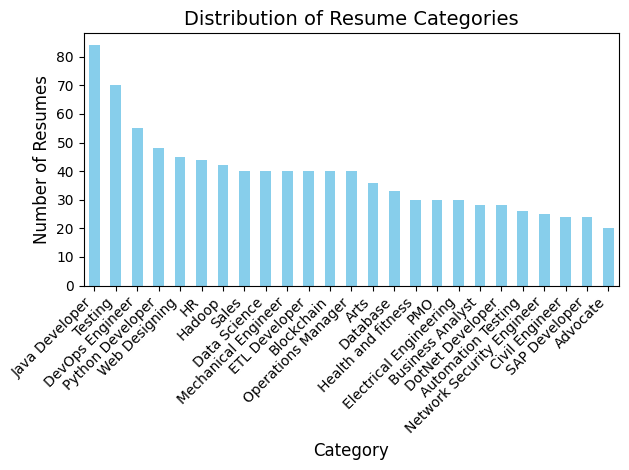

In [12]:
import matplotlib.pyplot as plt

# Plot top categories by frequency
df['Category'].value_counts().plot(kind='bar', color='skyblue')

# Add labels and title
plt.title("Distribution of Resume Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Resumes", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Adding fake metadata for the frontend later
from faker import Faker

fake = Faker()

df["Resume ID"] = ["R"+ str(i) for i in range(1, len(df)+1)]
df["Candidate Name"] = [fake.name() for _ in range(len(df))]
df["Email"] = [fake.email() for _ in range(len(df))]


In [39]:
df.head()

,Category,Resume,Resume_Length,Resume ID,Candidate Name,Email
0,Data Science,Skills * Programming Languages: Python (pandas...,670,R1,Dylan Morgan,jamesmartinez@example.org
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,163,R2,Mark Miller,xcarter@example.com
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",265,R3,Sandra Garrett,jamesjuan@example.org
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,993,R4,Brooke Walker,cristina15@example.com
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",69,R5,Sylvia Crane,willissamantha@example.org


In [14]:
# Filtering the resume length

df["Resume_Length"] = df["Resume"].apply(lambda x: len(x.split()))

In [15]:
# Filter resumes with at least 50 words
df = df[df["Resume_Length"] >= 50].reset_index(drop=True)

print("Remaining resumes after filtering:", df.shape[0])

Remaining resumes after filtering: 932


Data Preprocessing


In [16]:
! pip install nltk

In [17]:
# Import
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet lemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize the text
    words = text.split()

    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word)
                     for word in words
                     if word not in stop_words and len(word) > 2]

    # Join back to a string
    return " ".join(cleaned_words)

In [21]:
# Apply cleaning to create a new column
df["Cleaned_Resume"] = df["Resume"].apply(clean_text)

# Preview a few results
df[["Resume ID", "Candidate Name", "Cleaned_Resume"]].head()

,Resume ID,Candidate Name,Cleaned_Resume
0,R1,Megan Morrison,skill programming language python panda numpy ...
1,R2,Ryan Chavez,education detail may may uitrgpv data scientis...
2,R3,Dana Johnson,area interest deep learning control system des...
3,R4,Christopher Wells,skill python sap hana tableau sap hana sql sap...
4,R5,Michael Fernandez,education detail mca ymcaust faridabad haryana...


In [22]:
df.head()

,Category,Resume,Resume_Length,Resume ID,Candidate Name,Email,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,670,R1,Megan Morrison,kimberly80@example.net,skill programming language python panda numpy ...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,163,R2,Ryan Chavez,laurenbarnes@example.net,education detail may may uitrgpv data scientis...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",265,R3,Dana Johnson,nicolelarson@example.org,area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,993,R4,Christopher Wells,victoria98@example.org,skill python sap hana tableau sap hana sql sap...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",69,R5,Michael Fernandez,ahull@example.net,education detail mca ymcaust faridabad haryana...


In [23]:
# Save cleaned and enriched dataset
df.to_csv("cleaned_resumes_with_metadata.csv", index=False)

# Optional: Download to your computer
from google.colab import files
files.download("cleaned_resumes_with_metadata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Development

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


In [28]:
def rank_resumes(job_description, df, top_n=10):
  cleaned_jd = clean_text(job_description)

  jd_input = [cleaned_jd]


#  Vectorize jd_input and cleaned_resume
  vectorizer = TfidfVectorizer()
  resume_vectors = vectorizer.fit_transform(df["Cleaned_Resume"])

  jd_vector = vectorizer.transform(jd_input)

# Compute cosine similarity
  scores = cosine_similarity(jd_vector, resume_vectors).flatten()

#  Get top 10
  top_n = 10
  top_indices = scores.argsort()[::-1][:top_n]

# Combine with metadata
  top_resumes = df.iloc[top_indices].copy()
  top_resumes["Match_Score (%)"] = (scores[top_indices] * 100).round(2)

#  Show result
  return top_resumes[["Resume ID", "Candidate Name", "Email", "Match_Score (%)"]]




In [29]:
job_description = """
We are looking for a Data Scientist with strong skills in Python, machine learning,
NLP, and experience with libraries such as TensorFlow or PyTorch. The ideal candidate
should have experience in data wrangling and model deployment.
"""

In [30]:
top_resumes = rank_resumes(job_description, df)
print(top_resumes)

   Resume ID    Candidate Name                       Email  Match_Score (%)
37       R38       Joy Schmidt  cassandrakelly@example.org            30.28
17       R18   Mitchell Murray       ljacobson@example.com            30.28
27       R28     Janice Little     davisjohnny@example.com            30.28
7         R8       Bruce Vance         tpalmer@example.net            30.28
6         R7   Jennifer Harper        nicole06@example.net            24.98
36       R37        Lisa Berry        justin47@example.net            24.98
16       R17       Monica Hill    jessicabrown@example.net            24.98
26       R27     Robert Dalton       markhuber@example.org            24.98
28       R29  Travis Maldonado       pooletodd@example.org            23.76
18       R19       Sandra Hays       millerann@example.com            23.76


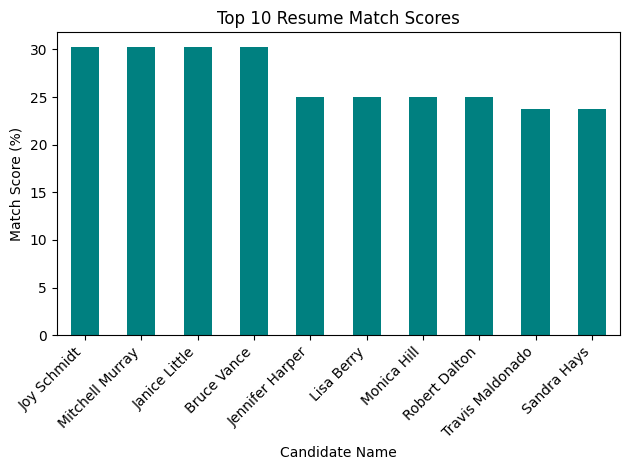

In [26]:
top_resumes.plot(kind='bar', x='Candidate Name', y='Match_Score (%)', color='teal', legend=False)
plt.title("Top 10 Resume Match Scores")
plt.ylabel("Match Score (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()